# Autocalibration 
## Step 2. [NPPAll]

NOTE: Once the Step 1 is done. The parameters/cmt_calparbgc.txt needs to be updated. 

The next step is to change NMax (rate if maximum N uptake) to target GPPall once the N limitation modules are turned back on. 

In [4]:
import Mads
import PyCall
@show pwd()

pwd() = "/work/scripts"


"/work/scripts"

In [5]:
PyCall.py"""

import sys,os
sys.path.append(os.path.join('/work','scripts'))
import TEM

def run_TEM(x):
    
    for j in range(len(dvmdostem.params)):
        dvmdostem.params[j]['val']=x[j]   
    # update param files
    dvmdostem.clean()
    dvmdostem.setup(calib=True)
    dvmdostem.update_params()
    dvmdostem.run(calib=True)

    return dvmdostem.get_calibration_outputs()[16:24]

def get_param_targets():
    return dvmdostem.get_calibration_outputs(calib=True)[16:24]

dvmdostem=TEM.TEM_model()
dvmdostem.calib_mode='NPPAll'
dvmdostem.opt_run_setup='--pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0'
dvmdostem.set_params(cmtnum=5, params=['nmax','nmax','nmax','nmax','nmax','nmax','nmax','nmax'], \
                               pftnums=[0,1,2,3,4,5,6,7])
"""
initial_guess=[7.0, 8.2, 9.0, 27.6, 4.5, 3.0, 3.0, 3.0]
y_init=PyCall.py"run_TEM"(initial_guess)
#y_truth_cmax_gpp=PyCall.py"run_TEM"([134.4, 4.4, 337.6, 594.0, 3.5, 32.3, 90.3, 47.3])

NOTE: Make sure to enable 'eq' outputs in the config file!!!
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets

8-element Vector{Float64}:
  47.14844241514802
   1.343648399412632
 116.08809614628554
 205.32357028722762
   1.0386202898807824
   8.991744828224181
  28.543421745300293
  15.192046743631362

In [6]:
PyCall.py"get_param_targets"()

Loading calibration_targets from : ['/work/calibration']
Resetting path...


8-element Vector{Float64}:
  30.71
   0.89
  75.63
 134.04
   0.686
   5.92
  18.79
  10.01

In [7]:
function TEM_pycall(parameters::AbstractVector)
        predictions = PyCall.py"run_TEM"(parameters)
        return predictions
end
obs=PyCall.py"get_param_targets"()
obs_time=1:length(obs)

Loading calibration_targets from : ['/work/calibration']
Resetting path...


1:8

In [7]:
obs

8-element Vector{Float64}:
  30.71
   0.89
  75.63
 134.04
   0.686
   5.92
  18.79
  10.01

In [8]:
md = Mads.createproblem(initial_guess, obs, TEM_pycall;
    paramkey=["nmax0","nmax1","nmax2","nmax3","nmax4","nmax5","nmax6","nmax7"],
    paramdist=["Uniform(1, 20)","Uniform(1, 20)","Uniform(1, 20)","Uniform(1, 50)",
               "Uniform(1, 20)","Uniform(1, 20)","Uniform(1, 20)","Uniform(1, 20)"],
    obstime=obs_time,
    obsweight=[100,100,100,100,100,100,100,100],
    problemname="Calibration_NPPAll")

Mads.showparameters(md)
Mads.showobservations(md)

nmax0 =               7 distribution = Uniform(1, 20) 
nmax1 =             8.2 distribution = Uniform(1, 20) 
nmax2 =               9 distribution = Uniform(1, 20) 
nmax3 =            27.6 distribution = Uniform(1, 50) 
nmax4 =             4.5 distribution = Uniform(1, 20) 
nmax5 =               3 distribution = Uniform(1, 20) 
nmax6 =               3 distribution = Uniform(1, 20) 
nmax7 =               3 distribution = Uniform(1, 20) 
Number of optimizable parameters: 8
o1         target =           30.71 weight =             100 time =               1
o2         target =            0.89 weight =             100 time =               2
o3         target =           75.63 weight =             100 time =               3
o4         target =          134.04 weight =             100 time =               4
o5         target =           0.686 weight =             100 time =               5
o6         target =            5.92 weight =             100 time =               6
o7         target = 

In [9]:
Mads.forward(md)

NOTE: Make sure to enable 'eq' outputs in the config file!!!
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets

OrderedCollections.OrderedDict{Any, Float64} with 8 entries:
  "o1" => 47.1484
  "o2" => 1.34365
  "o3" => 116.088
  "o4" => 205.324
  "o5" => 1.03862
  "o6" => 8.99174
  "o7" => 28.5434
  "o8" => 15.192

#### round1

In [10]:
calib_param, calib_information = Mads.calibrate(md)

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outs

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/sin

/data/workflows/single_run/config/output_spec.csv File present!NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_L

Loading calibration_targets from : ['/work/calibration']NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/sin

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/sin

/data/workflows/single_run/config/output_spec.csv File present!NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_L

Loading calibration_targets from : ['/work/calibration']NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/sin

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/sin

/data/workflows/single_run/config/output_spec.csv File present!NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_L

Loading calibration_targets from : ['/work/calibration']NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/sin

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/sin

/data/workflows/single_run/config/output_spec.csv File present!NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_L

Loading calibration_targets from : ['/work/calibration']NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/sin

(OrderedCollections.OrderedDict("nmax0" => 7.0344183205837165, "nmax1" => 19.036822485489914, "nmax2" => 8.926070374868623, "nmax3" => 1.001312089552534, "nmax4" => 11.631467978393616, "nmax5" => 3.0, "nmax6" => 3.0, "nmax7" => 3.0), OptimBase.MultivariateOptimizationResults{LsqFit.LevenbergMarquardt, Float64, 1}(LsqFit.LevenbergMarquardt(), [-0.3773100323597493, -0.24453508083746284, -0.1585582806376999, 0.08581959050589583, -0.6835880591724431, -0.9099510309719299, -0.9099510309719299, -0.9099510309719299], [-2377.8122228476086, 3249.5234014666644, -423.9485639757556, 1116.8258389402088, 3.0222073664608233, -0.9099510309719299, -0.9099510309719299, -0.9099510309719299], 3.5784054368198395e7, 6, false, true, 0.0001, 0.0, false, 0.001, 0.0, false, 1.0e-6, 0.0, false, Iter     Function value   Gradient norm 
------   --------------   --------------
, 109, 6, 0))

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


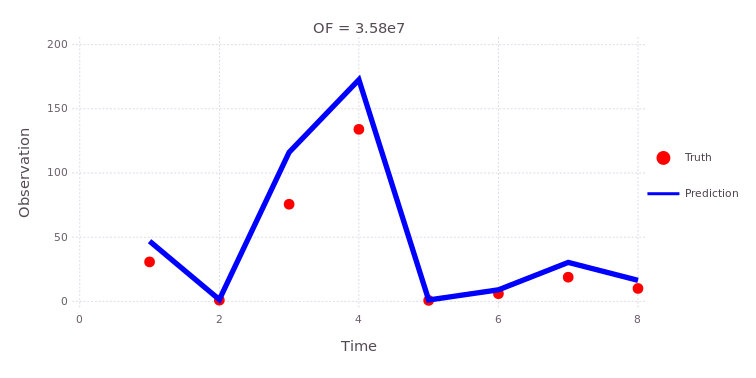

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /w

In [11]:
Mads.plotmatches(md, calib_param)

#### round2

In [12]:
PyCall.py"""

import sys,os
sys.path.append(os.path.join('/work','scripts'))
import TEM

def run_TEM(x):
    
    for j in range(len(dvmdostem.params)):
        dvmdostem.params[j]['val']=x[j]   
    # update param files
    dvmdostem.clean()
    dvmdostem.setup(calib=True)
    dvmdostem.update_params()
    dvmdostem.run(calib=True)

    return dvmdostem.get_calibration_outputs()[16:24]

def get_param_targets():
    return dvmdostem.get_calibration_outputs(calib=True)[16:24]

dvmdostem=TEM.TEM_model()
dvmdostem.calib_mode='NPPAll'
dvmdostem.opt_run_setup='--pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0'
dvmdostem.set_params(cmtnum=5, params=['cmax','cmax','cmax','cmax','cmax','cmax','cmax','cmax', \
                                       'nmax','nmax','nmax','nmax','nmax','nmax','nmax','nmax'], \
                               pftnums=[0,1,2,3,4,5,6,7, \
                                        0,1,2,3,4,5,6,7])
"""
initial_guess=[134.4, 4.4, 337.6, 594.0, 3.5, 32.3, 90.3, 47.3, 7.0, 8.2, 9.0, 27.6, 4.5, 3.0, 3.0, 3.0]
y_init=PyCall.py"run_TEM"(initial_guess)
#y_truth_cmax_gpp=PyCall.py"run_TEM"([134.4, 4.4, 337.6, 594.0, 3.5, 32.3, 90.3, 47.3])

NOTE: Make sure to enable 'eq' outputs in the config file!!!
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets

8-element Vector{Float64}:
  47.14844241514802
   1.343648399412632
 116.08809614628554
 205.32357028722762
   1.0386202898807824
   8.991744828224181
  28.543421745300293
  15.192046743631362

In [13]:
function TEM_pycall(parameters::AbstractVector)
        predictions = PyCall.py"run_TEM"(parameters)
        return predictions
end
obs=PyCall.py"get_param_targets"()
obs_time=1:length(obs)

Loading calibration_targets from : ['/work/calibration']
Resetting path...


1:8

In [14]:
md = Mads.createproblem(initial_guess, obs, TEM_pycall;
    paramkey=["cmax0","cmax1","cmax2","cmax3","cmax4","cmax5","cmax6","cmax7",
              "nmax0","nmax1","nmax2","nmax3","nmax4","nmax5","nmax6","nmax7"],
    paramdist=["Uniform(0.1, 200)","Uniform(0.1, 90)","Uniform(0.1, 350)","Uniform(0.1, 600)",
               "Uniform(0.1, 50)","Uniform(0.1, 350)","Uniform(0.1, 200)","Uniform(0.1, 150)",
               "Uniform(1, 20)","Uniform(1, 20)","Uniform(1, 20)","Uniform(1, 50)",
               "Uniform(1, 20)","Uniform(1, 20)","Uniform(1, 20)","Uniform(1, 20)"],
    obstime=obs_time,
    #obsweight=[100,100,100,100,100,100,100,100],
    problemname="Calibration_NPPAll")

Mads.showparameters(md)
Mads.showobservations(md)

cmax0 =           134.4 distribution = Uniform(0.1, 200) 
cmax1 =             4.4 distribution = Uniform(0.1, 90) 
cmax2 =           337.6 distribution = Uniform(0.1, 350) 
cmax3 =             594 distribution = Uniform(0.1, 600) 
cmax4 =             3.5 distribution = Uniform(0.1, 50) 
cmax5 =            32.3 distribution = Uniform(0.1, 350) 
cmax6 =            90.3 distribution = Uniform(0.1, 200) 
cmax7 =            47.3 distribution = Uniform(0.1, 150) 
nmax0 =               7 distribution = Uniform(1, 20) 
nmax1 =             8.2 distribution = Uniform(1, 20) 
nmax2 =               9 distribution = Uniform(1, 20) 
nmax3 =            27.6 distribution = Uniform(1, 50) 
nmax4 =             4.5 distribution = Uniform(1, 20) 
nmax5 =               3 distribution = Uniform(1, 20) 
nmax6 =               3 distribution = Uniform(1, 20) 
nmax7 =               3 distribution = Uniform(1, 20) 
Number of optimizable parameters: 16
o1         target =           30.71 weight =               1 

In [15]:
calib_param, calib_information = Mads.calibrate(md)

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outs

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/sin

/data/workflows/single_run/config/output_spec.csv File present!NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_L

Loading calibration_targets from : ['/work/calibration']NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/sin

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/sin

/data/workflows/single_run/config/output_spec.csv File present!NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_L

Loading calibration_targets from : ['/work/calibration']NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/sin

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/sin

/data/workflows/single_run/config/output_spec.csv File present!NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_L

Loading calibration_targets from : ['/work/calibration']NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/wor

(OrderedCollections.OrderedDict("cmax0" => 92.91460367238015, "cmax1" => 3.259384010870537, "cmax2" => 167.50707306780296, "cmax3" => 469.77007729930415, "cmax4" => 3.008632564608117, "cmax5" => 50.98770917640453, "cmax6" => 112.2933191518102, "cmax7" => 77.72565740575124, "nmax0" => 6.952864011570744, "nmax1" => 8.199910317105521…), OptimBase.MultivariateOptimizationResults{LsqFit.LevenbergMarquardt, Float64, 1}(LsqFit.LevenbergMarquardt(), [0.35082410845011375, -1.1298265075296787, 1.1920329289429827, 1.3704447317403508, -1.0426197858000819, -0.9543660710746142, -0.09770414914958443, -0.3792747212848225, -0.3773100323597493, -0.24453508083746284, -0.1585582806376999, 0.08581959050589583, -0.6835880591724431, -0.9099510309719299, -0.9099510309719299, -0.9099510309719299], [-0.07145043696652797, -1.1936337933946115, -0.04312812684473666, -3.7430296516080106, -1.083114630896218, -0.7882635142841945, 0.12280286172262064, 0.03570681864218462, -0.3826528136931199, -0.244544810614579, -0.19

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


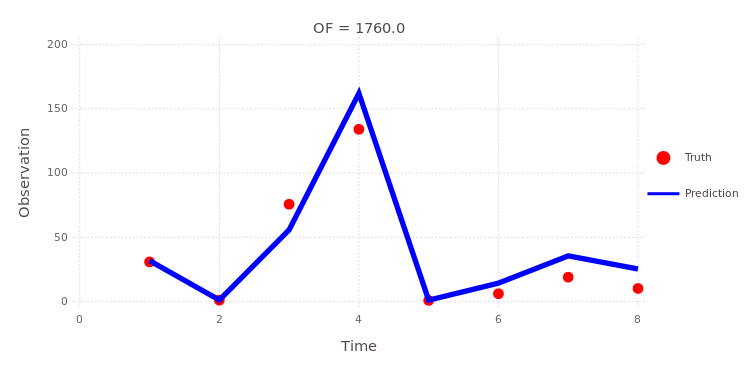

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /w

In [16]:
Mads.plotmatches(md, calib_param)

In [29]:
#round 2
initial_guess=collect(values(calib_param))
md = Mads.createproblem(initial_guess, obs, TEM_pycall;
    paramkey=["cmax0","cmax1","cmax2","cmax3","cmax4","cmax5","cmax6","cmax7",
              "nmax0","nmax1","nmax2","nmax3","nmax4","nmax5","nmax6","nmax7"],
    paramdist=["Uniform(0.1, 200)","Uniform(0.1, 90)","Uniform(0.1, 350)","Uniform(0.1, 600)",
               "Uniform(0.1, 50)","Uniform(0.1, 350)","Uniform(0.1, 200)","Uniform(0.1, 150)",
               "Uniform(1, 50)","Uniform(1, 50)","Uniform(1, 50)","Uniform(1, 50)",
               "Uniform(1, 20)","Uniform(1, 20)","Uniform(1, 20)","Uniform(1, 20)"],
    obstime=obs_time,
    obsweight=[10,10,100,100,10,80,80,80],
    problemname="Calibration_NPPAll")

Mads.showparameters(md)
Mads.showobservations(md)

cmax0 =         92.9146 distribution = Uniform(0.1, 200) 
cmax1 =         3.25938 distribution = Uniform(0.1, 90) 
cmax2 =         167.507 distribution = Uniform(0.1, 350) 
cmax3 =          469.77 distribution = Uniform(0.1, 600) 
cmax4 =         3.00863 distribution = Uniform(0.1, 50) 
cmax5 =         50.9877 distribution = Uniform(0.1, 350) 
cmax6 =         112.293 distribution = Uniform(0.1, 200) 
cmax7 =         77.7257 distribution = Uniform(0.1, 150) 
nmax0 =         6.95286 distribution = Uniform(1, 20) 
nmax1 =         8.19991 distribution = Uniform(1, 20) 
nmax2 =         8.68725 distribution = Uniform(1, 20) 
nmax3 =         27.6094 distribution = Uniform(1, 50) 
nmax4 =         4.49986 distribution = Uniform(1, 20) 
nmax5 =               3 distribution = Uniform(1, 20) 
nmax6 =               3 distribution = Uniform(1, 20) 
nmax7 =               3 distribution = Uniform(1, 20) 
Number of optimizable parameters: 16
o1         target =           30.71 weight =              10 

In [30]:
calib_param, calib_information = Mads.calibrate(md)

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outs

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/sin

/data/workflows/single_run/config/output_spec.csv File present!NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_L

Loading calibration_targets from : ['/work/calibration']NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/sin

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/sin

/data/workflows/single_run/config/output_spec.csv File present!NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_L

Loading calibration_targets from : ['/work/calibration']NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/sin

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/sin

/data/workflows/single_run/config/output_spec.csv File present!NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_L

Loading calibration_targets from : ['/work/calibration']NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/sin

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/sin

/data/workflows/single_run/config/output_spec.csv File present!NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_L

Loading calibration_targets from : ['/work/calibration']NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/sin

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/sin

/data/workflows/single_run/config/output_spec.csv File present!NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_L

Loading calibration_targets from : ['/work/calibration']NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/sin

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/sin

/data/workflows/single_run/config/output_spec.csv File present!NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_L

Loading calibration_targets from : ['/work/calibration']NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/sin

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/sin

/data/workflows/single_run/config/output_spec.csv File present!NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_L

Loading calibration_targets from : ['/work/calibration']NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/sin

(OrderedCollections.OrderedDict("cmax0" => 92.00133461322682, "cmax1" => 3.0110693009731326, "cmax2" => 227.74234546495185, "cmax3" => 388.1837139317358, "cmax4" => 2.3442304995174554, "cmax5" => 21.930245572630415, "cmax6" => 61.33961666458836, "cmax7" => 32.27329147202764, "nmax0" => 6.952610752000091, "nmax1" => 8.1997195204004…), OptimBase.MultivariateOptimizationResults{LsqFit.LevenbergMarquardt, Float64, 1}(LsqFit.LevenbergMarquardt(), [-0.07145043696652809, -1.1936337933946115, -0.0431281268447366, 0.6014369980182173, -1.083114630896218, -0.7882635142841945, 0.12280286172262073, 0.03570681864218471, -0.38265281369311993, -0.24454481061457894, -0.19199313134050472, 0.08620556584462924, -0.6836073045046875, -0.9099510309719299, -0.9099510309719299, -0.9099510309719299], [-0.08061420287060174, -1.208929654281988, 0.30593529272253844, 0.29822918265532883, -1.1434068009360447, -1.0658906156420211, -0.3976984903984321, -0.6074026346638945, -0.38268155111493646, -0.24456551039768082, -

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


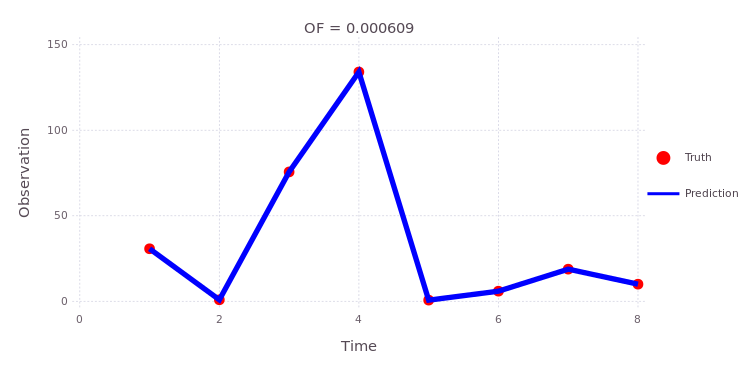

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /w

In [31]:
Mads.plotmatches(md, calib_param)

### Local sensitivity and uncertainty quantification

In [39]:
values(calib_param)

ValueIterator for a OrderedCollections.OrderedDict{String, Float64} with 16 entries. Values:
  92.00133461322682
  3.0110693009731326
  227.74234546495185
  388.1837139317358
  2.3442304995174554
  21.930245572630415
  61.33961666458836
  32.27329147202764
  6.952610752000091
  8.1997195204004
  8.686801174896768
  27.608391769667207
  4.4995005361986316
  3.0
  3.0
  3.0

In [ ]:
  92.0, 3.01, 227.74, 388.18, 2.34, 21.93, 61.34, 32.27
  6.95    8.2   8.7    27.6  4.5   3.0, 3.0, 3.0

In [32]:
calib_param

OrderedCollections.OrderedDict{String, Float64} with 16 entries:
  "cmax0" => 92.0013
  "cmax1" => 3.01107
  "cmax2" => 227.742
  "cmax3" => 388.184
  "cmax4" => 2.34423
  "cmax5" => 21.9302
  "cmax6" => 61.3396
  "cmax7" => 32.2733
  "nmax0" => 6.95261
  "nmax1" => 8.19972
  "nmax2" => 8.6868
  "nmax3" => 27.6084
  "nmax4" => 4.4995
  "nmax5" => 3.0
  "nmax6" => 3.0
  "nmax7" => 3.0

In [33]:
localsa = Mads.localsa(md; filename="model_diagnostics.png", par=collect(values(calib_param)))

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outs

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/sin

/data/workflows/single_run/config/output_spec.csv File present!NOTE: Make sure to enable 'eq' outputs in the config file!!!


LinearAlgebra.SingularException(14)LinearAlgebra.SingularException(14)┌ Warning: 2022-09-11 00:34:44 JpJ inversion fails
└ @ Mads /home/develop/.julia/dev/Mads/src/MadsLog.jl:53



/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workfl

In [34]:
[Mads.getparamlabels(md) localsa["stddev"]]

LoadError: MethodError: no method matching getindex(::Nothing, ::String)

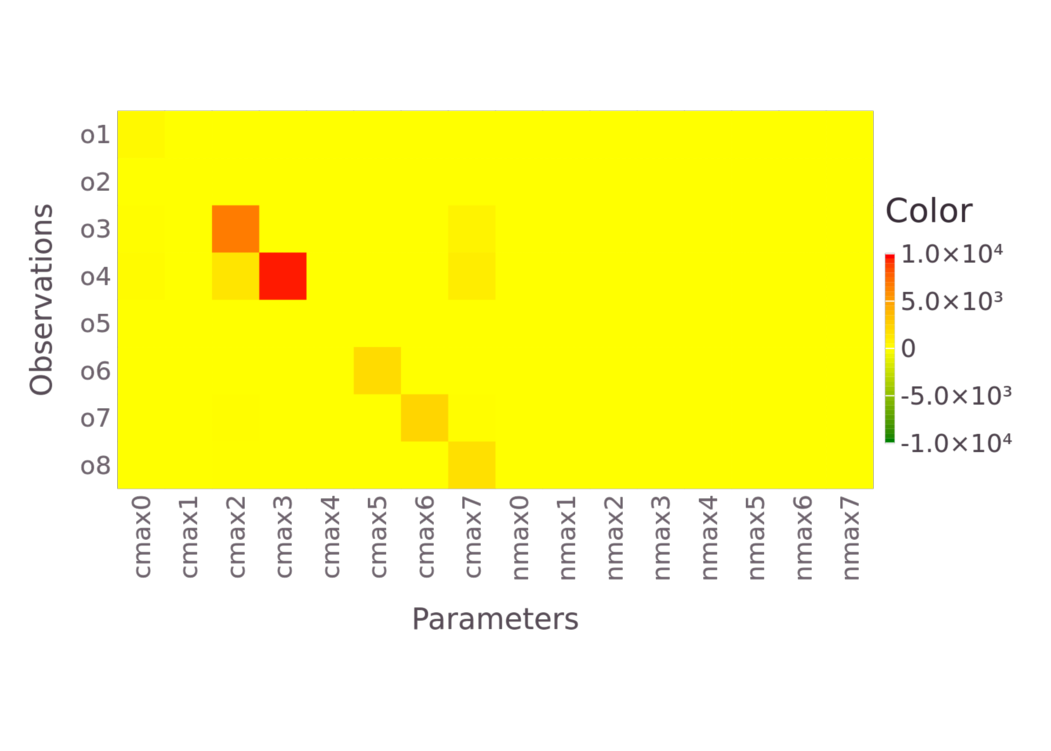

In [35]:
Mads.display("model_diagnostics-jacobian.png")

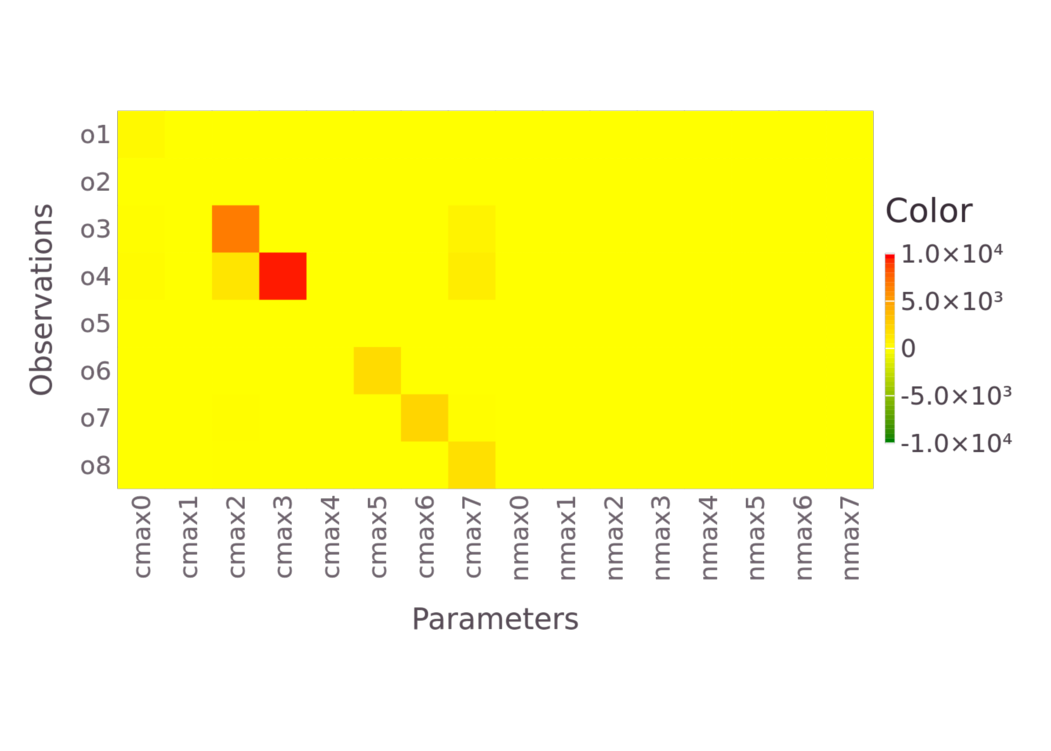

In [37]:
Mads.display("model_diagnostics-jacobian.png")

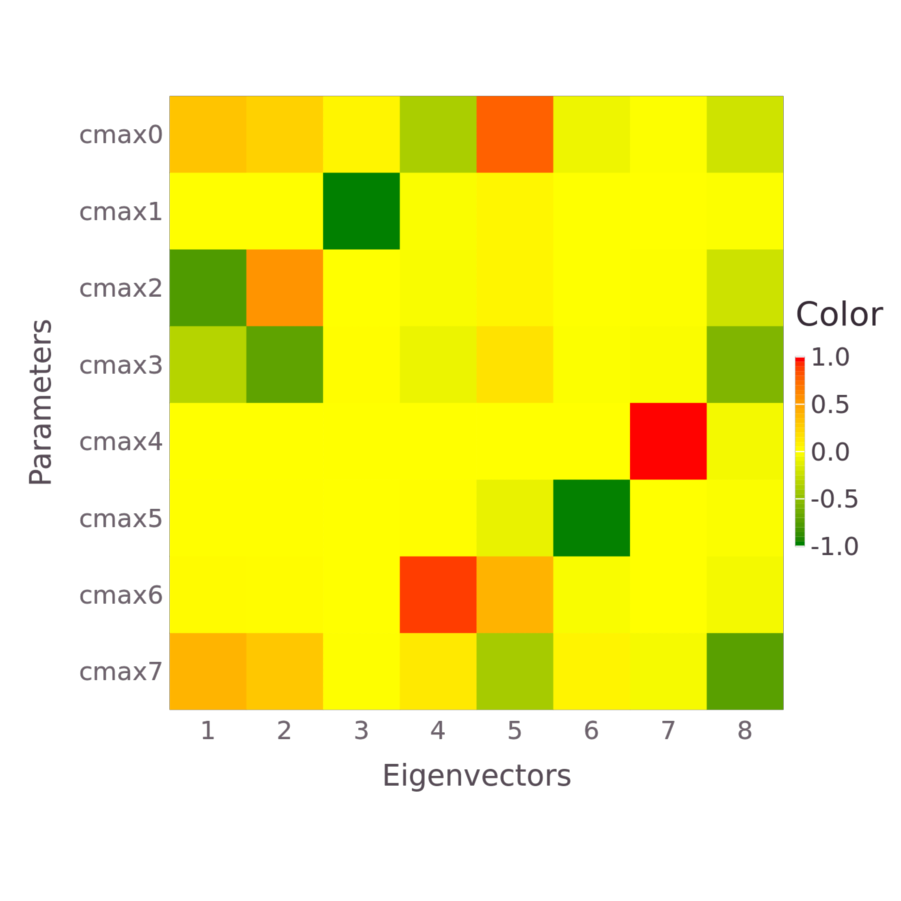

In [38]:
Mads.display("model_diagnostics-eigenmatrix.png")

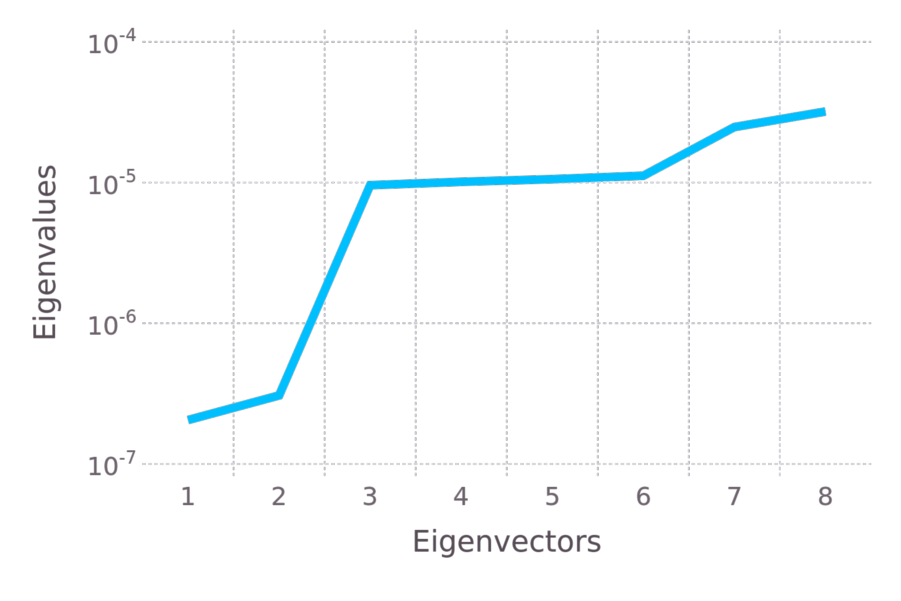

In [22]:
Mads.display("model_diagnostics-eigenvalues.png")

In [ ]:
chain, llhoods = Mads.emceesampling(md; numwalkers=10, nsteps=100000, burnin=10000, thinning=10, seed=2016, sigma=0.01)



[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup]

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/work

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/work

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/work

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/work

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/work

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/work

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/work

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/work

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/work

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/work

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/work

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/work

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/work

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/work

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/work

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/work

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/work

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/work

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/work

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/work

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/work

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/work

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/work

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/work

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/work

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/work

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/work

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/work

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/work

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/work

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/work

Excessive output truncated after 528448 bytes.